In [1]:
import numpy as np
import pandas as pd

The [MNIST-1D](https://github.com/greydanus/mnist1d) dataset is a small (n = 5000), low-dimensional (D = 40) synthetic dataset that replaces the hand-written digits from the [MNIST digits](https://yann.lecun.com/exdb/mnist/) dataset with roughly similar 1D template patterns to represent the digits, which are then randomly transformed to create 500 examples per "digit". While smaller, it's harder to separate these classes. You could see these as time-series data or a 1D image.

In [2]:
import pickle

import httpx

url = "https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl"
response = httpx.get(url, follow_redirects=True)

data = pickle.loads(response.content)
data.keys()

dict_keys(['x', 'x_test', 'y', 'y_test', 't', 'templates'])

In [3]:
X = np.concatenate((data["x"], data["x_test"]))
y = np.concatenate((data["y"], data["y_test"]))

In [4]:
X.shape

(5000, 40)

In [5]:
y.shape, y[:10]

((5000,), array([2, 6, 4, 5, 6, 6, 6, 0, 3, 1]))

In [6]:
pd.Series(y).value_counts()

2    500
6    500
4    500
5    500
0    500
3    500
1    500
9    500
8    500
7    500
Name: count, dtype: int64

Create categories out of the target before saving:

In [7]:
target = pd.Series(y, name="Class").to_frame()
target["Class"] = target["Class"].astype("category")
target["Class"]

0       2
1       6
2       4
3       5
4       6
       ..
4995    2
4996    5
4997    9
4998    6
4999    4
Name: Class, Length: 5000, dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [8]:
from drnb.io.pipeline import create_default_pipeline

data_result = create_default_pipeline(check_for_duplicates=True).run(
    "mnist1d",
    data=X,
    target=target,
    tags=["synthetic", "lowdim", "small"],
    url="https://github.com/greydanus/mnist1d",
    verbose=True,
)

[23:27:21] INFO     Requesting one extra neighbor to account for self-neighbor       ]8;id=502383;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=371151;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#623\623]8;;\

           INFO     Initial data shape: (5000, 40)                                    ]8;id=954436;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=794900;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#83\83]8;;\

           INFO     Keeping all columns                                             ]8;id=21990;file:///home/james/dev/drnb3/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=1497;file:///home/james/dev/drnb3/src/drnb/preprocess.py#90\90]8;;\

           INFO     Data shape after filtering columns: (5000, 40)                   ]8;id=595530;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=917928;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#164\164]8;;\

           INFO     Removing rows with NAs                                           ]8;id=127251;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=669457;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#145\145]8;;\

           INFO     Data shape after filtering NAs: (5000, 40)                       ]8;id=680675;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=805808;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#156\156]8;;\

           INFO     Checked for duplicates: found 0                                  ]8;id=898879;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=574618;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#172\172]8;;\

           INFO     Converting to numpy with {'dtype': 'float32', 'layout': 'c'}     ]8;id=649939;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=475976;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#187\187]8;;\

           INFO     Writing data for mnist1d                                         ]8;id=576936;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=945938;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#298\298]8;;\

           INFO     Processing target with initial shape (5000, 1)                   ]8;id=14609;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=35178;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#243\243]8;;\

           INFO     Keeping all columns                                             ]8;id=891081;file:///home/james/dev/drnb3/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=12391;file:///home/james/dev/drnb3/src/drnb/preprocess.py#90\90]8;;\

           INFO     Writing target for mnist1d                                       ]8;id=94742;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=550591;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#298\298]8;;\

           INFO     Calculating nearest neighbors                                    ]8;id=634272;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=91971;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#317\317]8;;\

[23:27:22] INFO     Loading faiss with AVX2 support.                                   ]8;id=864963;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py\loader.py]8;;\:]8;id=416045;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py#110\110]8;;\

           INFO     Successfully loaded faiss with AVX2 support.                       ]8;id=436825;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py\loader.py]8;;\:]8;id=305689;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py#112\112]8;;\

           INFO     Using 'faiss' to find nearest neighbors                           ]8;id=581669;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=81356;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#90\90]8;;\

           INFO     Finding 151 neighbors using faiss with euclidean metric and      ]8;id=62465;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=462598;file:///home/james/dev/drnb3/src/drnb/neighbors/__init__.py#103\103]8;;\
                    params: {}                                                                      

           INFO     Writing numpy format to                                          ]8;id=52195;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=215351;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\
                    nn/mnist1d.16.euclidean.exact.faiss.idx.npy                                     

           INFO     Writing csv format to                                            ]8;id=487081;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=74145;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\
                    nn/mnist1d.16.euclidean.exact.faiss.idx.csv                                     

           INFO     Writing numpy format to                                          ]8;id=542570;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=351429;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\
                    nn/mnist1d.16.euclidean.exact.faiss.dist.npy                                    

           INFO     Writing csv format to                                            ]8;id=768425;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=567771;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\
                    nn/mnist1d.16.euclidean.exact.faiss.dist.csv                                    

[23:27:23] INFO     Writing numpy format to                                          ]8;id=305885;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=505472;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\
                    nn/mnist1d.51.euclidean.exact.faiss.idx.npy                                     

           INFO     Writing csv format to                                            ]8;id=776804;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=374668;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\
                    nn/mnist1d.51.euclidean.exact.faiss.idx.csv                                     

[23:27:24] INFO     Writing numpy format to                                          ]8;id=324362;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=966374;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\
                    nn/mnist1d.51.euclidean.exact.faiss.dist.npy                                    

           INFO     Writing csv format to                                            ]8;id=607546;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=602189;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\
                    nn/mnist1d.51.euclidean.exact.faiss.dist.csv                                    

           INFO     Writing numpy format to                                          ]8;id=874189;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=794845;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\
                    nn/mnist1d.151.euclidean.exact.faiss.idx.npy                                    

           INFO     Writing csv format to                                            ]8;id=820762;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=564520;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\
                    nn/mnist1d.151.euclidean.exact.faiss.idx.csv                                    

[23:27:25] INFO     Writing numpy format to                                          ]8;id=828589;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=514148;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\
                    nn/mnist1d.151.euclidean.exact.faiss.dist.npy                                   

           INFO     Writing csv format to                                            ]8;id=157730;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=877102;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\
                    nn/mnist1d.151.euclidean.exact.faiss.dist.csv                                   

[23:27:26] INFO     Calculating triplets                                             ]8;id=110909;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=291303;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#331\331]8;;\

[23:27:27] INFO     Writing csv format to triplets/mnist1d.5.1337.idx.csv            ]8;id=960166;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=85259;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\

           INFO     Writing csv format to triplets/mnist1d.5.1337.euclidean.csv      ]8;id=973529;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=388985;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#402\402]8;;\

           INFO     Writing numpy format to triplets/mnist1d.5.1337.idx.npy          ]8;id=828810;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=472066;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\

           INFO     Writing numpy format to triplets/mnist1d.5.1337.euclidean.npy    ]8;id=450360;file:///home/james/dev/drnb3/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=986129;file:///home/james/dev/drnb3/src/drnb/io/__init__.py#430\430]8;;\

           INFO     Writing pipeline result for mnist1d                              ]8;id=875217;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=897613;file:///home/james/dev/drnb3/src/drnb/io/pipeline.py#134\134]8;;\

Let's quickly confirm the [observation by Dmitry Kobak](https://github.com/greydanus/mnist1d#dimensionality-reduction) that MNIST-1D is much harder to get nice clusters out of than MNIST (although we will use UMAP instead of t-SNE):

/home/james/dev/drnb3/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


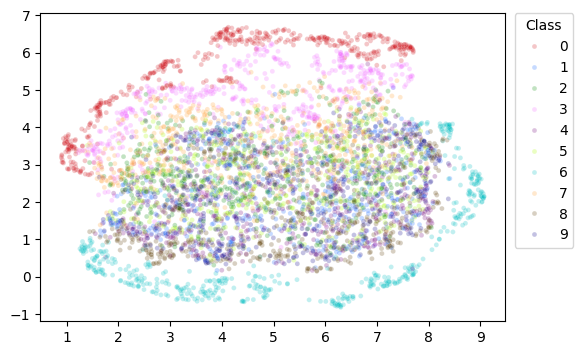

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.72104), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.6466859), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.21064000000000002), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.23947600000000002), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.28174), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [9]:
import drnb.embed.pipeline as pl

pl.standard_eval(
    method="umap",
    dataset="mnist1d",
)